In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
a = Value(2.0)
b = Value(4.0)
a.exp()
a / 3

Value(data=0.6666666666666666)

In [4]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label = "{ %s | data % .4f | grad %.4f}" % (n.label, n.data, n.grad, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [5]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.88123415, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

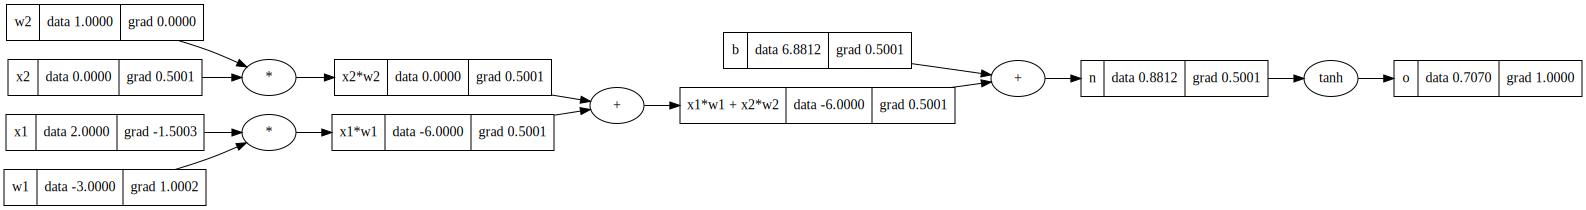

In [6]:
o.backward()
draw_dot(o)

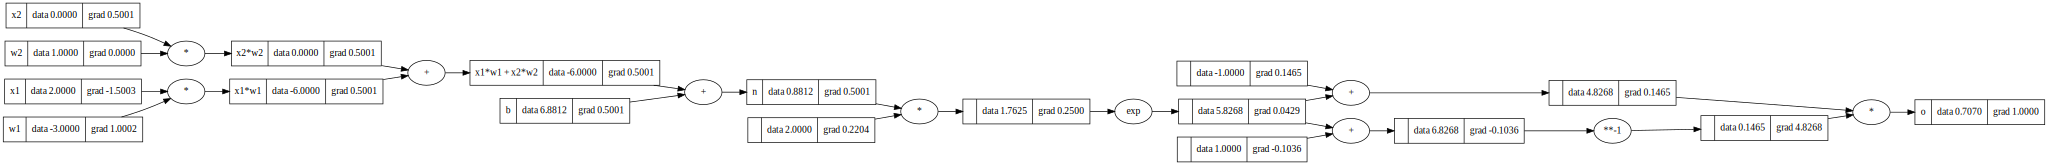

In [7]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.88123415, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1) / (e+1); o.label = 'o'

o.backward()
draw_dot(o)

In [8]:
import torch

x1 = torch.Tensor([2.0]).double()       ; x1.requires_grad = True
w1 = torch.Tensor([-3.0]).double()       ; w1.requires_grad = True
x2 = torch.Tensor([0.0]).double()       ; x2.requires_grad = True
w2 = torch.Tensor([1.0]).double()       ; w2.requires_grad = True
b = torch.Tensor([6.88137]).double()    ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())

0.7071050214706146
---
x1 -1.500007465833125
w1 1.0000049772220834
x2 0.5000024886110417
w2 0.0


In [9]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8495902372410464)

In [10]:
# draw_dot(n(x))
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [11]:
n.train(xs, ys)
n.forward(xs)

0 7.074053410988469
1 1.97796976313872
2 3.5294226933031805
3 4.020877518872763
4 3.963920671005151
5 3.9526132985367903
6 3.930736692391925
7 3.86905994186479
8 3.3882971054969304
9 0.019587259443214825
10 0.013816171677044457
11 0.011325686700778591
12 0.009837065052251247
13 0.008814012923084504
14 0.008051979410961934
15 0.007453632476616392
16 0.0069660081455889785
17 0.006557514359833767
18 0.006207992720080099
19 0.0059038951744201755
20 0.005635732017358577
21 0.005396627805870361
22 0.005181458890403872
23 0.004986314906186543
24 0.004808149759532351


[Value(data=0.9758350320398469),
 Value(data=-0.978594827067655),
 Value(data=-0.9608115904747894),
 Value(data=0.9545391424424642)]